## Load joint info from csv file

In [1]:
## load joint info

import pandas as pd 


JOINT_CSV_FILENAME = '/var/data/MET2/activity.csv'
IMG_PATH_PREFIX = '/var/data/MET2/'

numJoints = 14
# prepare column names 
colNames = list()
colNames.append('ID')
for n in range(numJoints):
    colNames.append("x{}".format(n+1))
    colNames.append("y{}".format(n+1))    
for n in range(numJoints):
    colNames.append("v{}".format(n+1))
print(colNames)

MET2_joints=pd.read_csv(JOINT_CSV_FILENAME,header=None,names=colNames) #,index_col=0)
#joints.shape()
MET2_joints.head()

['ID', 'x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4', 'x5', 'y5', 'x6', 'y6', 'x7', 'y7', 'x8', 'y8', 'x9', 'y9', 'x10', 'y10', 'x11', 'y11', 'x12', 'y12', 'x13', 'y13', 'x14', 'y14', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14']


,ID,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14
0,image/office activities/walking about/1.png,113,172,113,147,137,117,119,117,123,...,0,0,0,0,0,0,0,0,0,0
1,image/office activities/walking about/10.png,187,196,184,159,177,115,205,110,203,...,0,0,0,0,0,0,0,0,0,0
2,image/office activities/walking about/11.jpg,73,294,73,227,66,160,79,153,96,...,0,0,0,0,0,1,1,1,0,0
3,image/office activities/walking about/12.jpg,196,188,200,145,198,104,170,100,176,...,0,0,0,0,0,0,0,0,0,0
4,image/office activities/walking about/13.jpg,102,189,86,136,131,110,131,118,131,...,0,0,0,1,1,0,0,0,0,0


In [2]:
# column names
MET2_joints.columns

Index(['ID', 'x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4', 'x5', 'y5', 'x6',
       'y6', 'x7', 'y7', 'x8', 'y8', 'x9', 'y9', 'x10', 'y10', 'x11', 'y11',
       'x12', 'y12', 'x13', 'y13', 'x14', 'y14', 'v1', 'v2', 'v3', 'v4', 'v5',
       'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14'],
      dtype='object')

In [3]:
# get info of a sample
import numpy as np

imageIdx = 1
imageFilename = IMG_PATH_PREFIX+MET2_joints.loc[imageIdx][0]
print(imageFilename)
joints = MET2_joints.loc[imageIdx][1:14*2+1]
joints = np.asarray(joints).reshape(-1,2)
print(joints)

/var/data/MET2/image/office activities/walking about/10.png
[[187 196]
 [184 159]
 [177 115]
 [205 110]
 [203 152]
 [196 182]
 [161 113]
 [163 91]
 [170 56]
 [212 56]
 [217 85]
 [217 113]
 [190 47]
 [189 25]]


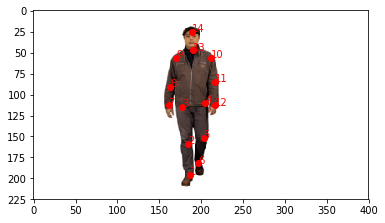

In [4]:
# plot image with true joints
import cv2
import matplotlib.pyplot as plt
%matplotlib inline


def plotJoint(joints):
    # mark joint
    plt.plot(joints[:,0],joints[:,1], 'or')

    # add number
    numJoints, dim = joints.shape    
    for n in range(numJoints):
        plt.text(joints[n,0],joints[n,1], "{}".format(n+1), color=(1,0,0))
        

# load image
image = cv2.imread(imageFilename)
if image is None:
    print("Cannot load image.")
else:
    image.shape
    plt.imshow(image[:,:,::-1])
    plotJoint(joints)
    
    plt.show()
# 

In [5]:
# let's estimate joints!